In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
warnings.filterwarnings(action='ignore')

In [10]:
df = pd.read_csv("data/modified_train_0417.csv")
x_train = df.drop(columns=['loan_status', 'addr_state', 'Unnamed: 0'])
y_train = df['loan_status']

In [11]:
nan_indices = np.isnan(x_train).any(axis=1)
x_train = x_train[~nan_indices]
y_train = y_train[~nan_indices]

In [12]:
x_train = x_train.astype('float32')
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [13]:
model = RandomForestClassifier(n_estimators=40)
model.fit(x_train, y_train)
print(cross_val_score(model, x_train, y_train, cv=5))

[0.79654002 0.79728995 0.79749031 0.79687089 0.79749488]


In [14]:
train_y_predict = model.predict(x_train)
valid_y_predict = model.predict(x_validation)

In [15]:
print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(x_validation, y_validation)))
print("훈련 세트 recall: {:.3f}".format(recall_score(y_train, train_y_predict)))
print("테스트 세트 recall: {:.3f}".format(recall_score(y_validation, valid_y_predict)))
print("훈련 세트 precision: {:.3f}".format(precision_score(y_train, train_y_predict)))
print("테스트 세트 precision: {:.3f}".format(precision_score(y_validation, valid_y_predict)))
print("훈련 세트 f1: {:.3f}".format(f1_score(y_train, train_y_predict)))
print("테스트 세트 f1: {:.3f}".format(f1_score(y_validation, valid_y_predict)))

훈련 세트 정확도: 0.999
테스트 세트 정확도: 0.797
훈련 세트 recall: 0.996
테스트 세트 recall: 0.082
훈련 세트 precision: 1.000
테스트 세트 precision: 0.520
훈련 세트 f1: 0.998
테스트 세트 f1: 0.142


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

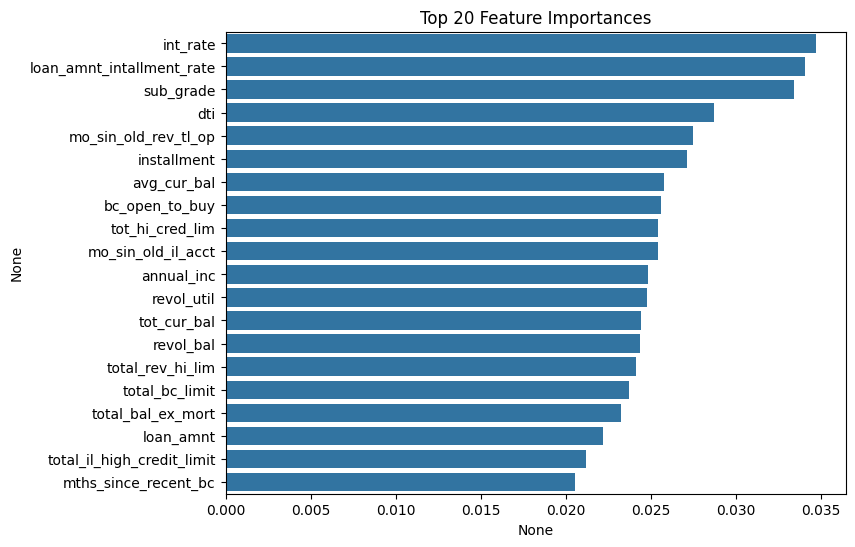

In [17]:
importance = model.feature_importances_
importances = pd.Series(importance, index=x_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt. figure (figsize=(8,6))
plt. title('Top 20 Feature Importances') 
sns.barplot(x=top20, y=top20.index)
plt.show()